In [1658]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split.
from sklearn.model_selection import train_test_split

# Import logistic regression
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler

In [1659]:
df = pd.read_csv('../airline_safety/clean_aviation_data.csv')

In [1660]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [1661]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [1662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_type            559 non-null    object 
 1   event_date            559 non-null    object 
 2   tail_number           559 non-null    object 
 3   highest_injury_level  559 non-null    object 
 4   fatal_injury_count    559 non-null    int64  
 5   serious_injury_count  559 non-null    int64  
 6   minor_injury_count    559 non-null    int64  
 7   probable_cause        559 non-null    object 
 8   latitude              559 non-null    float64
 9   longitude             559 non-null    float64
 10  airport_id            559 non-null    object 
 11  operator              559 non-null    object 
 12  make                  559 non-null    object 
 13  aircraft_damage       559 non-null    object 
 14  model                 559 non-null    object 
dtypes: float64(2), int64(3)

In [1663]:
df['aircraft_damage'].value_counts()

aircraft_damage
no_damage      205
Minor          192
Substantial    154
Destroyed        8
Name: count, dtype: int64

In [1664]:
df.isnull().sum()

event_type              0
event_date              0
tail_number             0
highest_injury_level    0
fatal_injury_count      0
serious_injury_count    0
minor_injury_count      0
probable_cause          0
latitude                0
longitude               0
airport_id              0
operator                0
make                    0
aircraft_damage         0
model                   0
dtype: int64

In [1665]:
df['operator'].value_counts()

operator
american       129
delta          102
united          89
southwest       62
continental     54
us airways      53
alaska          22
frontier        15
jetblue         11
hawaiian         7
allegiant        6
spirit           5
sun country      4
Name: count, dtype: int64

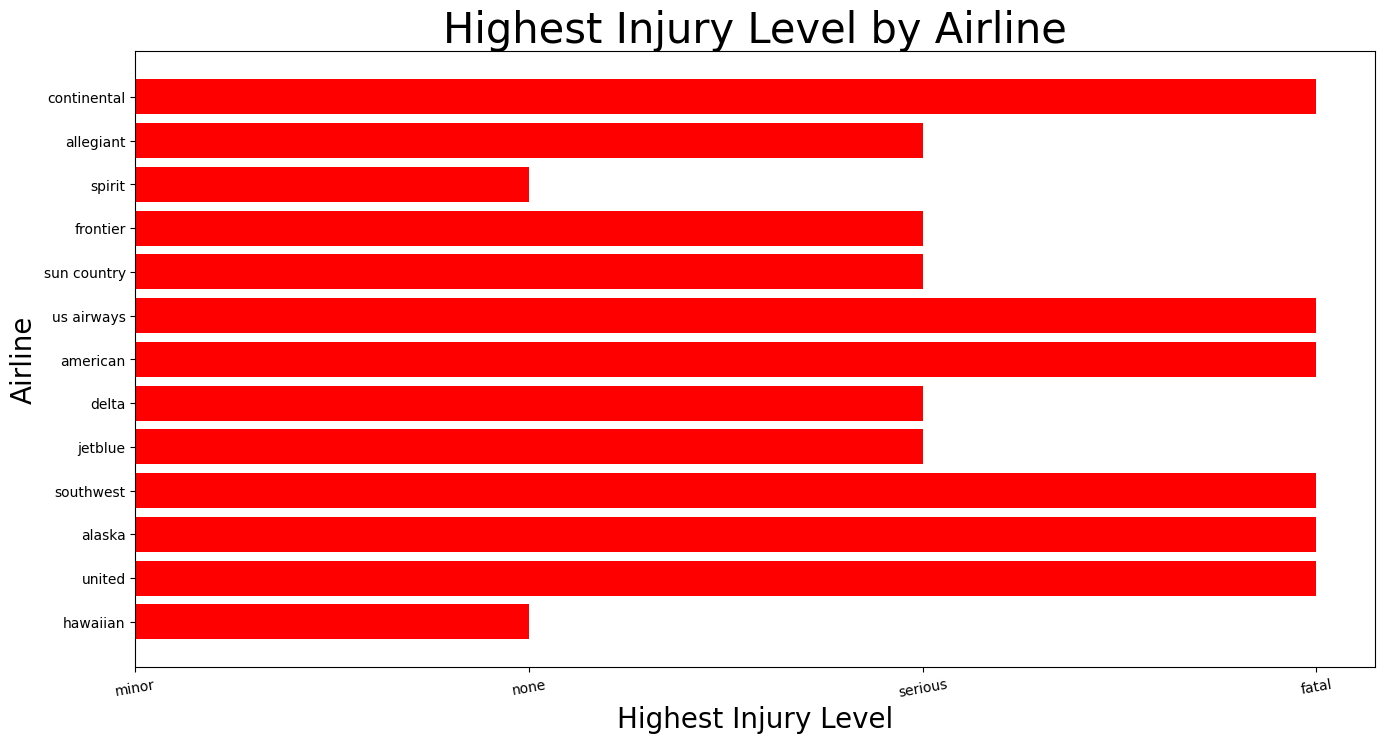

In [1666]:
plt.figure(figsize = (16, 8))

# Bar Chart
plt.barh(df['operator'],
       df['highest_injury_level'],
        color='r')

# Create a descriptive title
plt.title('Highest Injury Level by Airline',
         size = 30)

# rotate our x-ticks
plt.xticks(rotation = 10) #rotation is how many degrees to rotate tick mark

# label our axes
plt.xlabel('Highest Injury Level', size = 20)
plt.ylabel('Airline', size = 20);

In [1667]:
#df[df['operator'] == 'federal express']

In [1668]:
df.shape

(559, 15)

# Logistic Regression

In [1670]:
df['operator'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 559 entries, 0 to 558
Series name: operator
Non-Null Count  Dtype 
--------------  ----- 
559 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [1671]:
df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,hawaiian,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,united,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,alaska,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,southwest,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,jetblue,airbus,no_damage,A320


In [1672]:
# convert airlines into binary labels
df['operator'] = df['operator'].str.replace('alaska', 'budget')

In [1673]:
df['operator'] = df['operator'].str.replace('frontier', 'budget')

In [1674]:
df['operator'] = df['operator'].str.replace('jetblue', 'budget')

In [1675]:
df['operator'] = df['operator'].str.replace('allegiant', 'budget')

In [1676]:
df['operator'] = df['operator'].str.replace('spirit', 'budget')

In [1677]:
df['operator'] = df['operator'].str.replace('sun country', 'budget')

In [1678]:
df['operator'] = df['operator'].str.replace('southwest', 'budget')

In [1679]:
df['operator'].value_counts()

operator
american       129
budget         125
delta          102
united          89
continental     54
us airways      53
hawaiian         7
Name: count, dtype: int64

In [1680]:
df['operator'] = df['operator'].str.replace('american', 'non_budget')

In [1681]:
df['operator'] = df['operator'].str.replace('delta', 'non_budget')

In [1682]:
df['operator'] = df['operator'].str.replace('united', 'non_budget')

In [1683]:
df['operator'] = df['operator'].str.replace('continental', 'non_budget')

In [1684]:
df['operator'] = df['operator'].str.replace('hawaiian', 'non_budget')

In [1685]:
df['operator'] = df['operator'].str.replace('us airways', 'non_budget')

In [1686]:
df['operator'].value_counts()

operator
non_budget    434
budget        125
Name: count, dtype: int64

In [1687]:
df['operator'] = df['operator'].map({'budget': 1, 'non_budget':0})

df.head()

,event_type,event_date,tail_number,highest_injury_level,fatal_injury_count,serious_injury_count,minor_injury_count,probable_cause,latitude,longitude,airport_id,operator,make,aircraft_damage,model
0,INC,2023-11-30,N494HA,minor,0,0,1,unknown,20.899501,-156.429730,OGG,0,boeing,Minor,717
1,ACC,2023-09-30,N37560,none,0,0,0,unknown,39.849312,-104.673820,DEN,0,boeing,Substantial,737
2,ACC,2023-08-21,N516AS,none,0,0,0,unknown,33.675701,-117.867990,SNA,1,boeing,Substantial,737
3,INC,2023-08-11,"N7734H, N564HV",none,0,0,0,unknown,32.730189,-117.175620,SAN,1,boeing,no_damage,737
4,INC,2023-08-03,N649JB,none,0,0,0,unknown,30.486167,-81.750781,JAX,1,airbus,no_damage,A320


## Logistic Regression - Injury Count ONLY

In [1689]:
 

X = df[['fatal_injury_count', 'serious_injury_count', 'minor_injury_count']]
y = df['operator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42, stratify=y)

In [1690]:
y.value_counts(normalize=True)

operator
0    0.776386
1    0.223614
Name: proportion, dtype: float64

In [1691]:
lr = LogisticRegression()


In [1692]:
lr.fit(X_train, y_train)

LogisticRegression()

In [1693]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [1694]:
lr.score(X_train, y_train)

0.7829977628635347

In [1695]:
lr.score(X_test, y_test)

0.7767857142857143

### Standard Scaler


In [1697]:
#ss = StandardScaler()

#X_train_ss = ss.fit_transform(X_train)

#X_test_ss = ss.transform(X_test)

## Logistic Regression CountVectorizer

In [1699]:
X = df['probable_cause']
y = df['operator']

In [1700]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42, stratify=y)

In [1701]:
cvec = CountVectorizer(stop_words='english')

In [1702]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression())
])

In [1703]:
pipe_params = {
    'cvec__max_features': [100,200,300],
    'cvec__stop_words': ['english'],
    'cvec__min_df': [2,4],
    'cvec__max_df': [0.98, 0.95]
}

In [1704]:
gs = GridSearchCV(pipe,
                 pipe_params,
                 n_jobs = -1)

gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.7583270911360798


{'cvec__max_df': 0.98,
 'cvec__max_features': 300,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english'}

In [1705]:
preds = gs.predict(X_test)

In [1706]:
# Accuracy
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9194630872483222
0.7232142857142857


In [1707]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

spec = tn / (tn + fp)
print(f'Our model specificity: {spec}')

Our model specificity: 0.896551724137931


In [1708]:
fp, fn

(9, 22)

## KNN

In [1710]:
pipe_knn = Pipeline([
    ('tf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

pipe_knn_params = {
    'tf__stop_words': [None, 'english'],
    'tf__max_features': [100,200,300],
    'tf__min_df': [2, 4],
    'tf__max_df': [0.99, 0.95, 0.9],
    'knn__n_neighbors': range(4, 12, 2)
}

gs_knn = GridSearchCV(pipe_knn,
                     param_grid=pipe_knn_params,
                     n_jobs = -1)

gs_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tf', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(4, 12, 2),
                         'tf__max_df': [0.99, 0.95, 0.9],
                         'tf__max_features': [100, 200, 300],
                         'tf__min_df': [2, 4],
                         'tf__stop_words': [None, 'english']})

In [1711]:
print(gs_knn.best_score_)
gs_knn.best_params_

0.7762297128589264


{'knn__n_neighbors': 10,
 'tf__max_df': 0.99,
 'tf__max_features': 300,
 'tf__min_df': 4,
 'tf__stop_words': None}

In [1712]:

print(gs_knn.score(X_train, y_train))
print(gs_knn.score(X_test, y_test))

0.785234899328859
0.7767857142857143
